<a href="https://colab.research.google.com/github/OmriMan/Search-Engine-Wiki/blob/master/generic_test_run_frontend_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json

with open('queries_train.json', 'rt') as f:
  queries = json.load(f)

In [2]:
def average_precision(true_list, predicted_list, k=40):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    precisions = []
    for i,doc_id in enumerate(predicted_list):        
        if doc_id in true_set:
            prec = (len(precisions)+1) / (i+1)            
            precisions.append(prec)
    if len(precisions) == 0:
        return 0.0
    return round(sum(precisions)/len(precisions),3)

In [15]:
import requests
from time import time
# url = 'http://35.232.59.3:8080'
# place the domain you got from ngrok or GCP IP below. 
url = 'http://d866-34-125-55-195.ngrok.io'

qs_res=[]
qs_res_body = []
qs_res_title = []
qs_res_anchor = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search', {'query': q}, timeout=35)
    duration = time() - t_start
    
    t_start=time()
    res_body = requests.get(url + '/search_body', {'query': q}, timeout=35)
    duration_body = time() - t_start
    
    t_start=time()
    res_title = requests.get(url + '/search_title', {'query': q}, timeout=35)
    duration_title = time() - t_start
    
    t_start=time()
    res_anchor = requests.get(url + '/search_anchor', {'query': q}, timeout=35)
    duration_anchor = time() - t_start
    if res.status_code == 200:
      pred_wids, _ = zip(*res.json())
      ap = average_precision(true_wids, pred_wids)
    if res_body.status_code == 200:
      pred_wids, _ = zip(*res_body.json())
      ap_body = average_precision(true_wids, pred_wids)
    if res_title.status_code == 200:
      pred_wids, _ = zip(*res_title.json())
      ap_title = average_precision(true_wids, pred_wids)
    if res_anchor.status_code == 200:
      pred_wids, _ = zip(*res_anchor.json())
      ap_anchor = average_precision(true_wids, pred_wids)
    
  except:
    pass
  
  qs_res.append((q, duration, ap))
  qs_res_body.append((q, duration_body, ap_body))
  qs_res_title.append((q, duration_title, ap_title))
  qs_res_anchor.append((q, duration_anchor, ap_anchor))

print(qs_res)
print(qs_res_body)
print(qs_res_title)
print(qs_res_anchor)
#print(len(qs_res))

#search test
#print(requests.get(url + '/search',{'query':'hello'}, timeout=35).text)

#get_pageview test
#page id = 	675561 ????? elbaz search what is this this page
#print(requests.post(url + '/get_pageview', json=[12,675561,8,2023]).text)
#print(requests.get(url + '/search_anchor', {'query': 'political'}, timeout=35).text)
#print(requests.get(url + '/search_anchor', {'query': 'Clinical'}, timeout=35).text)
# print(requests.get(url + '/search_title', {'query': 'yoga'}, timeout=35).text)
# print(requests.get(url + '/search_title', {'query': 'NBA'}, timeout=35).text)


[('python', 0.9854161739349365, 1.0), ('data science', 0.6016943454742432, 0.976), ('migraine', 2.6111385822296143, None), ('chocolate', 0.805384635925293, 0.989), ('how to make pasta', 0.5874607563018799, 0.701), ('Does pasta have preservatives?', 0.8062472343444824, 0.419), ('how google works', 0.8011949062347412, 0.97), ('what is information retrieval', 0.8219008445739746, 0.997), ('NBA', 0.5978147983551025, 1.0), ('yoga', 0.5902543067932129, 1.0), ('how to not kill plants', 0.5707242488861084, 0.559), ('masks', 2.4744694232940674, None), ('black friday', 0.808417558670044, 1.0), ('why do men have nipples', 0.8133659362792969, 0.798), ('rubber duck', 0.6460740566253662, 0.892), ('michelin', 2.221484899520874, None), ('what to watch', 0.799203634262085, 0.93), ('best marvel movie', 0.8045446872711182, 0.998), ('how tall is the eiffel tower', 0.8195481300354004, 0.992), ('where does vanilla flavoring come from', 0.8125593662261963, 0.866), ('best ice cream flavour', 0.8172118663787842

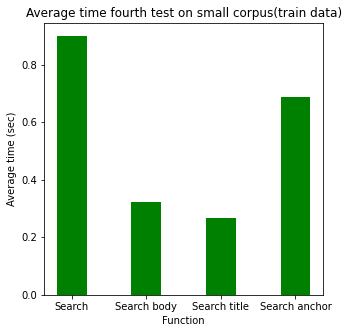

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# first test 080122
# qs_res = [('python', 2.5384621620178223, 1.0), ('data science', 2.5209224224090576, 0.969), ('migraine', 4.176694869995117, None), ('chocolate', 2.526787042617798, 0.979), ('how to make pasta', 2.4852962493896484, 0.858), ('Does pasta have preservatives?', 2.510969877243042, 0.479), ('how google works', 2.5129103660583496, 0.95), ('what is information retrieval', 2.4756240844726562, 1.0), ('NBA', 2.4828522205352783, 1.0), ('yoga', 2.522130012512207, 1.0), ('how to not kill plants', 2.4803316593170166, 0.677), ('masks', 4.010915517807007, None), ('black friday', 2.4786112308502197, 0.988), ('why do men have nipples', 2.4574055671691895, 1.0), ('rubber duck', 2.4981415271759033, 0.921), ('michelin', 4.202767372131348, None), ('what to watch', 2.454526662826538, 0.922), ('best marvel movie', 2.5065855979919434, 1.0), ('how tall is the eiffel tower', 2.4946682453155518, 1.0), ('where does vanilla flavoring come from', 2.4869296550750732, 0.887), ('best ice cream flavour', 2.305408000946045, 0.968), ('how to tie a tie', 2.523838996887207, 0.941), ('how to earn money online', 2.305356025695801, 0.678), ('what is critical race theory', 2.5095322132110596, 0.761), ('what space movie was made in 1992', 2.303758382797241, 0.947), ('how to vote', 2.52412486076355, 0.997), ('google trends', 2.4823739528656006, 0.516), ('dim sum', 2.298006772994995, 1.0), ('ted', 2.4763925075531006, 1.0), ('fairy tale', 2.518484354019165, 1.0)]
# qs_res_body = [('python', 1.954310417175293, 0.737), ('data science', 1.942124843597412, 0.195), ('migraine', 1.9730076789855957, 0.902), ('chocolate', 1.9622032642364502, 0.236), ('how to make pasta', 1.8233253955841064, 0.209), ('Does pasta have preservatives?', 1.9374403953552246, 0.956), ('how google works', 1.828319787979126, 0.102), ('what is information retrieval', 1.9320018291473389, 0.96), ('NBA', 1.9373087882995605, 0.978), ('yoga', 2.0665297508239746, 0.821), ('how to not kill plants', 1.9706358909606934, 0.608), ('masks', 1.8415749073028564, 0.781), ('black friday', 1.8309507369995117, 0.932), ('why do men have nipples', 2.15653920173645, 1.0), ('rubber duck', 1.9373526573181152, 0.97), ('michelin', 1.9515082836151123, 0.711), ('what to watch', 1.8205485343933105, 0.229), ('best marvel movie', 1.9549212455749512, 0.805), ('how tall is the eiffel tower', 1.9483232498168945, 0.866), ('where does vanilla flavoring come from', 1.9756622314453125, 0.486), ('best ice cream flavour', 2.1901142597198486, 0.134), ('how to tie a tie', 2.17901611328125, 0.284), ('how to earn money online', 1.9605958461761475, 0.605), ('what is critical race theory', 1.8533611297607422, 0.731), ('what space movie was made in 1992', 1.9638869762420654, 0.539), ('how to vote', 2.189530849456787, 0.523), ('google trends', 1.853276252746582, 0.608), ('dim sum', 1.9491310119628906, 1.0), ('ted', 2.186898946762085, 0.509), ('fairy tale', 1.943077564239502, 0.887)]
# qs_res_title=[('python', 0.09554839134216309, 1.0), ('data science', 0.10937762260437012, 0.968), ('migraine', 0.09468960762023926, 1.0), ('chocolate', 0.11356616020202637, 0.955), ('how to make pasta', 0.12443709373474121, 1.0), ('Does pasta have preservatives?', 0.10910820960998535, 0.2), ('how google works', 0.12520480155944824, 0.946), ('what is information retrieval', 0.12572979927062988, 0.989), ('NBA', 0.09897470474243164, 1.0), ('yoga', 0.12778568267822266, 1.0), ('how to not kill plants', 0.09523391723632812, 1.0), ('masks', 0.12721776962280273, 1.0), ('black friday', 0.1280364990234375, 0.998), ('why do men have nipples', 0.11391448974609375, 0.998), ('rubber duck', 0.09357571601867676, 0.803), ('michelin', 0.10637164115905762, 1.0), ('what to watch', 0.12726283073425293, 1.0), ('best marvel movie', 0.10508179664611816, 1.0), ('how tall is the eiffel tower', 0.09610462188720703, 1.0), ('where does vanilla flavoring come from', 0.10324525833129883, 1.0), ('best ice cream flavour', 0.09457802772521973, 0.992), ('how to tie a tie', 0.1097569465637207, 0.964), ('how to earn money online', 0.0973360538482666, 0.964), ('what is critical race theory', 0.13219428062438965, 0.964), ('what space movie was made in 1992', 0.09527111053466797, 0.994), ('how to vote', 0.1057119369506836, 1.0), ('google trends', 0.12332558631896973, 0.396), ('dim sum', 0.09126806259155273, 0.396), ('ted', 0.09569931030273438, 1.0), ('fairy tale', 0.14009451866149902, 1.0)]
# qs_res_anchor=[('python', 0.6507587432861328, 1.0), ('data science', 0.6557705402374268, 0.867), ('migraine', 0.41882920265197754, 1.0), ('chocolate', 0.6334362030029297, 0.97), ('how to make pasta', 0.6439564228057861, 0.916), ('Does pasta have preservatives?', 0.42290234565734863, 0.2), ('how google works', 0.6283090114593506, 0.91), ('what is information retrieval', 0.6305508613586426, 0.996), ('NBA', 0.41727352142333984, 0.996), ('yoga', 0.4113786220550537, 1.0), ('how to not kill plants', 0.6579318046569824, 1.0), ('masks', 0.6367509365081787, 1.0), ('black friday', 0.4041097164154053, 0.665), ('why do men have nipples', 0.4031031131744385, 0.665), ('rubber duck', 0.6346139907836914, 0.864), ('michelin', 0.6541030406951904, 1.0), ('what to watch', 0.403522253036499, 1.0), ('best marvel movie', 0.6460866928100586, 0.551), ('how tall is the eiffel tower', 0.6466331481933594, 0.998), ('where does vanilla flavoring come from', 0.4219968318939209, 1.0), ('best ice cream flavour', 0.4199807643890381, 0.689), ('how to tie a tie', 0.42246437072753906, 0.942), ('how to earn money online', 0.6712710857391357, 0.942), ('what is critical race theory', 0.6444482803344727, 0.942), ('what space movie was made in 1992', 0.4185328483581543, 0.813), ('how to vote', 0.410825252532959, 1.0), ('google trends', 0.6392216682434082, 0.331), ('dim sum', 0.4102771282196045, 0.331), ('ted', 0.40616631507873535, 0.984), ('fairy tale', 0.6600844860076904, 1.0)]


# #second test 080122
# qs_res=[('python', 0.7500922679901123, 1.0), ('data science', 0.7089040279388428, 0.969), ('migraine', 2.829312324523926, None), ('chocolate', 0.761467695236206, 0.979), ('how to make pasta', 0.6989057064056396, 0.858), ('Does pasta have preservatives?', 1.3211309909820557, 0.479), ('how google works', 0.7368402481079102, 0.95), ('what is information retrieval', 0.7076015472412109, 1.0), ('NBA', 0.7354714870452881, 1.0), ('yoga', 0.7293038368225098, 1.0), ('how to not kill plants', 0.740790843963623, 0.677), ('masks', 2.686007261276245, None), ('black friday', 0.7155623435974121, 0.988), ('why do men have nipples', 0.7355227470397949, 1.0), ('rubber duck', 0.788055419921875, 0.921), ('michelin', 2.7324044704437256, None), ('what to watch', 0.4593322277069092, 0.922), ('best marvel movie', 0.7230594158172607, 1.0), ('how tall is the eiffel tower', 0.715341329574585, 1.0), ('where does vanilla flavoring come from', 0.7242803573608398, 0.887), ('best ice cream flavour', 0.7277188301086426, 0.968), ('how to tie a tie', 0.6968955993652344, 0.941), ('how to earn money online', 0.6922216415405273, 0.678), ('what is critical race theory', 0.7228949069976807, 0.761), ('what space movie was made in 1992', 0.7101812362670898, 0.947), ('how to vote', 0.7156345844268799, 0.997), ('google trends', 0.7202422618865967, 0.516), ('dim sum', 0.7009892463684082, 1.0), ('ted', 0.7118532657623291, 1.0), ('fairy tale', 0.48483896255493164, 1.0)]
# qs_res_body=[('python', 0.10943293571472168, 0.737), ('data science', 0.371457576751709, 0.195), ('migraine', 0.13298606872558594, 0.195), ('chocolate', 0.1155400276184082, 0.236), ('how to make pasta', 0.11706781387329102, 0.209), ('Does pasta have preservatives?', 0.17290210723876953, 0.956), ('how google works', 0.11702847480773926, 0.102), ('what is information retrieval', 0.11633586883544922, 0.96), ('NBA', 0.17917966842651367, 0.978), ('yoga', 0.11426949501037598, 0.821), ('how to not kill plants', 0.11734747886657715, 0.608), ('masks', 0.11690711975097656, 0.608), ('black friday', 0.11664748191833496, 0.932), ('why do men have nipples', 0.12369871139526367, 1.0), ('rubber duck', 0.1315450668334961, 0.97), ('michelin', 0.11531400680541992, 0.97), ('what to watch', 0.13888120651245117, 0.229), ('best marvel movie', 0.1210470199584961, 0.805), ('how tall is the eiffel tower', 0.11155176162719727, 0.866), ('where does vanilla flavoring come from', 0.11524796485900879, 0.486), ('best ice cream flavour', 0.12317967414855957, 0.134), ('how to tie a tie', 0.11789584159851074, 0.284), ('how to earn money online', 0.11721563339233398, 0.605), ('what is critical race theory', 0.13480663299560547, 0.731), ('what space movie was made in 1992', 0.13068747520446777, 0.539), ('how to vote', 0.11512899398803711, 0.523), ('google trends', 0.1292717456817627, 0.608), ('dim sum', 0.11516070365905762, 1.0), ('ted', 0.11625981330871582, 0.509), ('fairy tale', 0.36969494819641113, 0.887)]
# qs_res_title=[('python', 0.09524655342102051, 1.0), ('data science', 0.09679412841796875, 0.968), ('migraine', 0.09652185440063477, 0.968), ('chocolate', 0.09748721122741699, 0.955), ('how to make pasta', 0.09660053253173828, 1.0), ('Does pasta have preservatives?', 0.09794330596923828, 0.2), ('how google works', 0.0922093391418457, 0.946), ('what is information retrieval', 0.09425115585327148, 0.989), ('NBA', 0.0980064868927002, 1.0), ('yoga', 0.09174680709838867, 1.0), ('how to not kill plants', 0.0961756706237793, 1.0), ('masks', 0.10965824127197266, 1.0), ('black friday', 0.09314680099487305, 0.998), ('why do men have nipples', 0.09440350532531738, 0.998), ('rubber duck', 0.09160852432250977, 0.803), ('michelin', 0.09165596961975098, 0.803), ('what to watch', 0.09736180305480957, 1.0), ('best marvel movie', 0.09732723236083984, 1.0), ('how tall is the eiffel tower', 0.09235477447509766, 1.0), ('where does vanilla flavoring come from', 0.09259462356567383, 1.0), ('best ice cream flavour', 0.09445738792419434, 0.992), ('how to tie a tie', 0.0906515121459961, 0.964), ('how to earn money online', 0.09525227546691895, 0.964), ('what is critical race theory', 0.0938880443572998, 0.964), ('what space movie was made in 1992', 0.09640049934387207, 0.994), ('how to vote', 0.09455370903015137, 1.0), ('google trends', 0.10035824775695801, 0.396), ('dim sum', 0.09440016746520996, 0.396), ('ted', 0.09292912483215332, 1.0), ('fairy tale', 0.09526205062866211, 1.0)]
# qs_res_anchor=[('python', 0.44530630111694336, 1.0), ('data science', 0.4258911609649658, 0.867), ('migraine', 0.734551191329956, 0.867), ('chocolate', 0.4302024841308594, 0.97), ('how to make pasta', 0.8499641418457031, 0.916), ('Does pasta have preservatives?', 0.9029431343078613, 0.2), ('how google works', 0.45349717140197754, 0.91), ('what is information retrieval', 0.7116775512695312, 0.996), ('NBA', 0.45789027214050293, 0.996), ('yoga', 0.7255010604858398, 1.0), ('how to not kill plants', 0.43957018852233887, 1.0), ('masks', 0.7012009620666504, 1.0), ('black friday', 0.43769264221191406, 0.665), ('why do men have nipples', 0.7017271518707275, 0.665), ('rubber duck', 0.48170971870422363, 0.864), ('michelin', 0.6924080848693848, 0.864), ('what to watch', 0.6791763305664062, 1.0), ('best marvel movie', 0.45461559295654297, 0.551), ('how tall is the eiffel tower', 0.683800220489502, 0.998), ('where does vanilla flavoring come from', 0.42586755752563477, 1.0), ('best ice cream flavour', 0.670762300491333, 0.689), ('how to tie a tie', 0.4331367015838623, 0.942), ('how to earn money online', 0.6829385757446289, 0.942), ('what is critical race theory', 0.45890235900878906, 0.942), ('what space movie was made in 1992', 0.6928772926330566, 0.813), ('how to vote', 0.45346951484680176, 1.0), ('google trends', 0.6838433742523193, 0.331), ('dim sum', 0.4498412609100342, 0.331), ('ted', 0.6701698303222656, 0.984), ('fairy tale', 0.45673584938049316, 1.0)]

# 3 test 080122
# qs_res = [('python', 0.8018429279327393, 1.0), ('data science', 0.7720167636871338, 0.969), ('migraine', 2.659184217453003, None), ('chocolate', 0.7140440940856934, 0.979), ('how to make pasta', 0.760491132736206, 0.858), ('Does pasta have preservatives?', 0.7308764457702637, 0.479), ('how google works', 0.7545261383056641, 0.95), ('what is information retrieval', 0.44499707221984863, 1.0), ('NBA', 0.7276318073272705, 1.0), ('yoga', 0.48365306854248047, 1.0), ('how to not kill plants', 0.7635729312896729, None), ('masks', 2.568030595779419, None), ('black friday', 0.7263050079345703, 0.988), ('why do men have nipples', 0.7191553115844727, None), ('rubber duck', 0.7630562782287598, 0.921), ('michelin', 2.3899941444396973, None), ('what to watch', 0.7452132701873779, 0.922), ('best marvel movie', 0.7663106918334961, 1.0), ('how tall is the eiffel tower', 0.7294220924377441, 1.0), ('where does vanilla flavoring come from', 0.7229163646697998, 0.887), ('best ice cream flavour', 0.718106746673584, 0.968), ('how to tie a tie', 0.7413442134857178, 0.941), ('how to earn money online', 0.7156586647033691, None), ('what is critical race theory', 0.7508139610290527, None), ('what space movie was made in 1992', 0.7246420383453369, 0.947), ('how to vote', 0.7195632457733154, 0.997), ('google trends', 0.7270514965057373, 0.516), ('dim sum', 0.7688851356506348, None), ('ted', 0.4429166316986084, 1.0), ('fairy tale', 0.7235736846923828, 1.0)]
# qs_res_body = [('python', 0.38024425506591797, 0.737), ('data science', 0.12516093254089355, 0.195), ('migraine', 0.13585448265075684, 0.195), ('chocolate', 0.11414599418640137, 0.236), ('how to make pasta', 0.12523555755615234, 0.209), ('Does pasta have preservatives?', 0.12182974815368652, 0.956), ('how google works', 0.11959362030029297, 0.102), ('what is information retrieval', 0.3539259433746338, 0.96), ('NBA', 0.11779308319091797, 0.978), ('yoga', 0.36214494705200195, 0.821), ('how to not kill plants', 0.35879015922546387, 0.608), ('masks', 0.12134337425231934, 0.608), ('black friday', 0.11687922477722168, 0.932), ('why do men have nipples', 0.11925172805786133, 1.0), ('rubber duck', 0.12151670455932617, 0.97), ('michelin', 0.37824273109436035, 0.97), ('what to watch', 0.12293553352355957, 0.229), ('best marvel movie', 0.1316218376159668, 0.805), ('how tall is the eiffel tower', 0.1172633171081543, 0.866), ('where does vanilla flavoring come from', 0.1248784065246582, 0.486), ('best ice cream flavour', 0.12434005737304688, 0.134), ('how to tie a tie', 0.12089300155639648, 0.284), ('how to earn money online', 0.11611151695251465, 0.605), ('what is critical race theory', 0.13452649116516113, 0.731), ('what space movie was made in 1992', 0.12299442291259766, 0.539), ('how to vote', 0.12333321571350098, 0.523), ('google trends', 0.1170046329498291, 0.608), ('dim sum', 0.11855196952819824, 1.0), ('ted', 0.1142888069152832, 0.509), ('fairy tale', 0.11640286445617676, 0.887)]
# qs_res_title=[('python', 0.09989333152770996, 1.0), ('data science', 0.09710931777954102, 0.968), ('migraine', 0.13093280792236328, 0.968), ('chocolate', 0.09752345085144043, 0.955), ('how to make pasta', 0.09895801544189453, 1.0), ('Does pasta have preservatives?', 0.11287140846252441, 0.2), ('how google works', 0.09537029266357422, 0.946), ('what is information retrieval', 0.09509444236755371, 0.989), ('NBA', 0.10217761993408203, 1.0), ('yoga', 0.0984342098236084, 1.0), ('how to not kill plants', 0.09959959983825684, 1.0), ('masks', 0.11853170394897461, 1.0), ('black friday', 0.09894418716430664, 0.998), ('why do men have nipples', 0.09504437446594238, 0.998), ('rubber duck', 0.09946751594543457, 0.803), ('michelin', 0.09872603416442871, 0.803), ('what to watch', 0.09812760353088379, 1.0), ('best marvel movie', 0.1030576229095459, 1.0), ('how tall is the eiffel tower', 0.09738540649414062, 1.0), ('where does vanilla flavoring come from', 0.09546661376953125, 1.0), ('best ice cream flavour', 0.0960235595703125, 0.992), ('how to tie a tie', 0.0949399471282959, 0.964), ('how to earn money online', 0.0950326919555664, 0.964), ('what is critical race theory', 0.09529757499694824, 0.964), ('what space movie was made in 1992', 0.09468889236450195, 0.994), ('how to vote', 0.09477043151855469, 1.0), ('google trends', 0.09476876258850098, 0.396), ('dim sum', 0.0937657356262207, 0.396), ('ted', 0.0957648754119873, 1.0), ('fairy tale', 0.09889435768127441, 1.0)]
# qs_res_anchor=[('python', 0.4670126438140869, 1.0), ('data science', 0.7819924354553223, 0.867), ('migraine', 0.7638547420501709, 0.867), ('chocolate', 0.4693031311035156, 0.97), ('how to make pasta', 0.7117829322814941, 0.916), ('Does pasta have preservatives?', 0.44255852699279785, 0.2), ('how google works', 0.7242953777313232, 0.91), ('what is information retrieval', 0.44191646575927734, 0.996), ('NBA', 0.7326951026916504, 0.996), ('yoga', 0.44640040397644043, 1.0), ('how to not kill plants', 0.4498765468597412, 1.0), ('masks', 0.44553446769714355, 1.0), ('black friday', 0.6933071613311768, 0.665), ('why do men have nipples', 0.452960729598999, 0.665), ('rubber duck', 0.7472038269042969, 0.864), ('michelin', 0.4873669147491455, 0.864), ('what to watch', 0.45848846435546875, 1.0), ('best marvel movie', 0.704941987991333, 0.551), ('how tall is the eiffel tower', 0.43444323539733887, 0.998), ('where does vanilla flavoring come from', 0.6830286979675293, 1.0), ('best ice cream flavour', 0.46025848388671875, 0.689), ('how to tie a tie', 0.6995372772216797, 0.942), ('how to earn money online', 0.4662315845489502, 0.942), ('what is critical race theory', 0.7116587162017822, 0.942), ('what space movie was made in 1992', 0.45586681365966797, 0.813), ('how to vote', 0.7144355773925781, 1.0), ('google trends', 0.4998588562011719, 0.331), ('dim sum', 0.7131874561309814, 0.331), ('ted', 0.6837332248687744, 0.984), ('fairy tale', 0.4571566581726074, 1.0)]

# # 4 test 080122
# qs_res =[('python', 0.9808123111724854, 1.0), ('data science', 0.5848965644836426, 0.976), ('migraine', 2.642216682434082, None), ('chocolate', 0.8228363990783691, 0.989), ('how to make pasta', 0.5920279026031494, 0.701), ('Does pasta have preservatives?', 0.8084652423858643, 0.419), ('how google works', 0.583961009979248, 0.97), ('what is information retrieval', 0.5827851295471191, 0.997), ('NBA', 0.8002321720123291, 1.0), ('yoga', 0.823143720626831, 1.0), ('how to not kill plants', 0.8078312873840332, 0.559), ('masks', 2.2441556453704834, None), ('black friday', 0.5989408493041992, 1.0), ('why do men have nipples', 0.5934348106384277, 0.798), ('rubber duck', 0.7984342575073242, 0.892), ('michelin', 2.446613073348999, None), ('what to watch', 0.8096718788146973, 0.93), ('best marvel movie', 0.8118774890899658, 0.998), ('how tall is the eiffel tower', 0.616220235824585, 0.992), ('where does vanilla flavoring come from', 0.5759179592132568, 0.866), ('best ice cream flavour', 0.8079533576965332, 0.96), ('how to tie a tie', 0.5971477031707764, 0.94), ('how to earn money online', 0.8168416023254395, 0.54), ('what is critical race theory', 0.8177163600921631, 0.587), ('what space movie was made in 1992', 0.5947835445404053, 0.914), ('how to vote', 0.588350772857666, 0.879), ('google trends', 0.8139786720275879, 0.455), ('dim sum', 0.590090274810791, 0.83), ('ted', 0.5958306789398193, 1.0), ('fairy tale', 0.5951383113861084, 1.0)]
# qs_res_body = [('python', 0.2811887264251709, 0.737), ('data science', 0.49326348304748535, 0.195), ('migraine', 0.28121113777160645, 0.195), ('chocolate', 0.28034210205078125, 0.236), ('how to make pasta', 0.5078814029693604, 0.209), ('Does pasta have preservatives?', 0.281264066696167, 0.956), ('how google works', 0.29314422607421875, 0.102), ('what is information retrieval', 0.28478145599365234, 0.96), ('NBA', 0.28881049156188965, 0.978), ('yoga', 0.3364675045013428, 0.821), ('how to not kill plants', 0.28223657608032227, 0.608), ('masks', 0.2907066345214844, 0.608), ('black friday', 0.28830790519714355, 0.932), ('why do men have nipples', 0.5063884258270264, 1.0), ('rubber duck', 0.2915036678314209, 0.97), ('michelin', 0.28406691551208496, 0.97), ('what to watch', 0.28539347648620605, 0.229), ('best marvel movie', 0.28998899459838867, 0.805), ('how tall is the eiffel tower', 0.2843632698059082, 0.866), ('where does vanilla flavoring come from', 0.4940769672393799, 0.486), ('best ice cream flavour', 0.2861673831939697, 0.134), ('how to tie a tie', 0.29100871086120605, 0.284), ('how to earn money online', 0.29076194763183594, 0.605), ('what is critical race theory', 0.28862714767456055, 0.731), ('what space movie was made in 1992', 0.2908594608306885, 0.539), ('how to vote', 0.4952685832977295, 0.523), ('google trends', 0.2848339080810547, 0.608), ('dim sum', 0.28339648246765137, 1.0), ('ted', 0.281726598739624, 0.509), ('fairy tale', 0.27974915504455566, 0.887)]
# qs_res_title = [('python', 0.26450037956237793, 1.0), ('data science', 0.2642204761505127, 0.968), ('migraine', 0.26537418365478516, 0.968), ('chocolate', 0.26583099365234375, 0.955), ('how to make pasta', 0.268465518951416, 1.0), ('Does pasta have preservatives?', 0.2640211582183838, 0.2), ('how google works', 0.2780184745788574, 0.946), ('what is information retrieval', 0.26490044593811035, 0.989), ('NBA', 0.26412296295166016, 1.0), ('yoga', 0.2645988464355469, 1.0), ('how to not kill plants', 0.26502418518066406, 1.0), ('masks', 0.2663915157318115, 1.0), ('black friday', 0.2701842784881592, 0.998), ('why do men have nipples', 0.2656252384185791, 0.998), ('rubber duck', 0.2710835933685303, 0.803), ('michelin', 0.27271103858947754, 0.803), ('what to watch', 0.2660644054412842, 1.0), ('best marvel movie', 0.26468992233276367, 1.0), ('how tall is the eiffel tower', 0.26483964920043945, 1.0), ('where does vanilla flavoring come from', 0.2657508850097656, 1.0), ('best ice cream flavour', 0.26658058166503906, 0.992), ('how to tie a tie', 0.2636382579803467, 0.964), ('how to earn money online', 0.26642942428588867, 0.964), ('what is critical race theory', 0.266751766204834, 0.964), ('what space movie was made in 1992', 0.2682774066925049, 0.994), ('how to vote', 0.26770877838134766, 1.0), ('google trends', 0.26576828956604004, 0.396), ('dim sum', 0.26651954650878906, 0.396), ('ted', 0.2668735980987549, 1.0), ('fairy tale', 0.26877665519714355, 1.0)]
# qs_res_anchor = [('python', 0.8050336837768555, 1.0), ('data science', 0.5788233280181885, 0.867), ('migraine', 0.5690808296203613, 0.867), ('chocolate', 0.8082003593444824, 0.97), ('how to make pasta', 0.5822141170501709, 0.916), ('Does pasta have preservatives?', 0.7940587997436523, 0.2), ('how google works', 0.7862606048583984, 0.91), ('what is information retrieval', 0.7906763553619385, 0.996), ('NBA', 0.5731227397918701, 0.996), ('yoga', 0.5707805156707764, 1.0), ('how to not kill plants', 0.7967946529388428, 1.0), ('masks', 0.7845392227172852, 1.0), ('black friday', 0.7948868274688721, 0.665), ('why do men have nipples', 0.5869264602661133, 0.665), ('rubber duck', 0.5632836818695068, 0.864), ('michelin', 0.7877514362335205, 0.864), ('what to watch', 0.5596523284912109, 1.0), ('best marvel movie', 0.7823500633239746, 0.551), ('how tall is the eiffel tower', 0.7878866195678711, 0.998), ('where does vanilla flavoring come from', 0.5611131191253662, 1.0), ('best ice cream flavour', 0.7814526557922363, 0.689), ('how to tie a tie', 0.7749745845794678, 0.942), ('how to earn money online', 0.5727777481079102, 0.942), ('what is critical race theory', 0.7814555168151855, 0.942), ('what space movie was made in 1992', 0.7745652198791504, 0.813), ('how to vote', 0.5695323944091797, 1.0), ('google trends', 0.7892069816589355, 0.331), ('dim sum', 0.7777907848358154, 0.331), ('ted', 0.782304048538208, 0.984), ('fairy tale', 0.7937579154968262, 1.0)]




avg_time = sum([i[1] for i in qs_res])/len(qs_res)
avg_time_body = sum([i[1] for i in qs_res_body])/len(qs_res_body)
avg_time_title = sum([i[1] for i in qs_res_title])/len(qs_res_title)
avg_time_anchor = sum([i[1] for i in qs_res_anchor])/len(qs_res_anchor)


# avg_average_precision_40 = sum([i[2] for i in qs_res])/len(qs_res)
# avg_average_precision_40_body = sum([i[2] for i in qs_res_body])/len(qs_res_body)
# avg_average_precision_40_title = sum([i[2] for i in qs_res_title])/len(qs_res_title)
# avg_average_precision_40_anchor = sum([i[2] for i in qs_res_anchor])/len(qs_res_anchor)

#Average time
time_data={'Search':avg_time,'Search body':avg_time_body,'Search title':avg_time_title,'Search anchor':avg_time_anchor}
function=list(time_data.keys())
values=list(time_data.values())

fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(function, values, color ='green',width = 0.4)
 
plt.xlabel("Function")
plt.ylabel("Average time (sec)")
plt.title("Average time fourth test on small corpus(train data)")
plt.show()



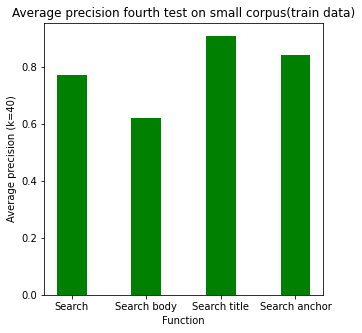

In [14]:
avg_average_precision_40 = sum([i[2] if i[2] is not None else 0 for i in qs_res])/len(qs_res)
avg_average_precision_40_body = sum([i[2] for i in qs_res_body])/len(qs_res_body)
avg_average_precision_40_title = sum([i[2] for i in qs_res_title])/len(qs_res_title)
avg_average_precision_40_anchor = sum([i[2] for i in qs_res_anchor])/len(qs_res_anchor)

#Average precision
precision_data={'Search':avg_average_precision_40,'Search body':avg_average_precision_40_body,'Search title':avg_average_precision_40_title,'Search anchor':avg_average_precision_40_anchor}
function=list(precision_data.keys())
values=list(precision_data.values())

fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(function, values, color ='green',width = 0.4)
 
plt.xlabel("Function")
plt.ylabel("Average precision (k=40)")
plt.title("Average precision fourth test on small corpus(train data)")
plt.show()

In [27]:
import requests
from time import time
# url = 'http://35.232.59.3:8080'
# place the domain you got from ngrok or GCP IP below. 
url = 'http://0759-34-122-240-65.ngrok.io'

t_start = time()
res = requests.post(url + '/get_pageview', json=[34258, 59580357, 315141, 47035547, 626718, 32016617, 59516988, 61583621, 38424, 196789, 734272, 60851303, 988753, 92222, 419015, 60992198, 621809, 83742, 3127300, 23834216, 1381751, 744158, 18911094, 1817874, 59052395, 43562594, 31793047, 6154795, 17452177, 62342792, 13936750, 60805249, 60823333, 59899027, 46719542, 7702313, 60310807, 44270128, 68489731, 60500106, 1652601, 359983, 60300514, 45482242, 34756533, 58520592, 43611227, 47586513, 1775374, 6933106, 13412771, 62549131, 49278248, 62557135, 4523354, 60468426, 666420, 1017009, 35795560, 34843274, 60199413, 16488467, 29828807, 585681, 41757168, 66018807, 61285582, 1226448, 28848113, 11487904, 4242777, 1661867, 10671559, 44035836, 6931929, 60705564, 61690747, 7343803, 9042644, 36991237, 3965223, 63090179, 632990, 1041815, 53087254, 418999, 1632919])
duration = time() - t_start
print(duration)
print(res.text)

t_start = time()
res = requests.post(url + '/get_pagerank', json=[34258, 59580357, 315141, 47035547, 626718, 32016617, 59516988, 61583621, 38424, 196789, 734272, 60851303, 988753, 92222, 419015, 60992198, 621809, 83742, 3127300, 23834216, 1381751, 744158, 18911094, 1817874, 59052395, 43562594, 31793047, 6154795, 17452177, 62342792, 13936750, 60805249, 60823333, 59899027, 46719542, 7702313, 60310807, 44270128, 68489731, 60500106, 1652601, 359983, 60300514, 45482242, 34756533, 58520592, 43611227, 47586513, 1775374, 6933106, 13412771, 62549131, 49278248, 62557135, 4523354, 60468426, 666420, 1017009, 35795560, 34843274, 60199413, 16488467, 29828807, 585681, 41757168, 66018807, 61285582, 1226448, 28848113, 11487904, 4242777, 1661867, 10671559, 44035836, 6931929, 60705564, 61690747, 7343803, 9042644, 36991237, 3965223, 63090179, 632990, 1041815, 53087254, 418999, 1632919])
duration = time() - t_start
print(duration)
print(res.text)


0.11990141868591309
[80260,7586,24309,5847,24350,6509,1831,1489,10675,7806,19795,22388,14796,17410,16266,843,23057,10667,1376,2092,11403,7627,8427,3783,1244,2328,1334,1828,5328,241,2943,54,380,213,15523,5708,705,10425,1439,941,908,8043,133,215,1163,656,22118,560,720,5019,1498,59,825,132,607,724,3693,2012,1054,5773,190,1504,338,12343,1639,449,61,4850,522,408,2531,969,553,674,963,585,184,268,60,582,1053,922,15679,6257,120,5183,15579]

0.0966634750366211
[83.99594185114448,9.45604981472203,8.380580114251691,8.11020896045297,16.272385307418013,0.41291724286653814,1.7940347142121646,0.26277566427191196,1.2218084388647872,1.7393116070195953,2.6741742356334357,1.7221327530291795,1.575401332613651,2.97067615767833,3.730605548508708,0.6928982299460693,11.194186005258684,13.65855912454737,1.711961906484961,1.1245083820805095,5.515282580218201,6.287814772813479,0.47042904830792065,1.045163072707094,2.446854098995287,0.2422050679132725,0.5457835440994311,1.2202916730566309,0.9985459792437439,0.184

In [45]:
# import matplotlib.pyplot as plt
# q = [i[0] for i in qs_res]
# x = [i[1] for i in qs_res]
# y = [i[2] for i in qs_res]


# plt.bar(x, y, tick_label = q,width = 0.8, color = ['red', 'green'])
# plt.xlabel("query")
# plt.ylabel("duration")
# #plt.ylabel("average precision")

# plt.title("first test - durations")

# plt.show()


save_test_list = qs_res
print(save_test_list)

[('python', 15.070565938949585, 1.0), ('data science', 17.99678111076355, 0.968), ('migraine', 7.277550458908081, 1.0), ('chocolate', 20.199448585510254, 0.955), ('how to make pasta', 3.704864263534546, 1.0), ('Does pasta have preservatives?', 3.7639801502227783, 0.2), ('how google works', 27.856329679489136, 0.946), ('what is information retrieval', 10.921855449676514, 0.989), ('NBA', 15.17752981185913, 1.0), ('yoga', 25.972076177597046, 1.0), ('how to not kill plants', 0.07571816444396973, None), ('masks', 6.999579906463623, 1.0), ('black friday', 23.65346097946167, 0.998), ('why do men have nipples', 0.09122037887573242, None), ('rubber duck', 4.815493106842041, 0.803), ('michelin', 8.729891777038574, 1.0), ('what to watch', 7.20874547958374, 1.0), ('best marvel movie', 19.271244525909424, 1.0), ('how tall is the eiffel tower', None, None), ('where does vanilla flavoring come from', None, None), ('best ice cream flavour', 15.673341512680054, 0.992), ('how to tie a tie', 10.267841577